# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [363]:
"Given a dataset containing vehicle features over a given time period, identify features impacting client purchase behavior. Client purchase behavir is primarily dependent on a subset of features, remaining features either do not play a major impact or not have any significance in determining the price of a vehicle."

'Given a dataset containing vehicle features over a given time period, identify features impacting client purchase behavior. Client purchase behavir is primarily dependent on a subset of features, remaining features either do not play a major impact or not have any significance in determining the price of a vehicle.'

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [369]:
"1) Print the data dimension head and view the data manually."
"2) Eye-ball the features and make a assume on which fields are important and which are irrelevant."
"3) Get a count for the missing data and assess which can be removed."
"4) Assess which data maybe outliers and assess removing."
"5) After handling integrity issues and cleaning, assess if scaling is needed and for which field"
"6) Identify textual fields which should be considered and decide on transformation option"
"7) Decide on training/testing/validation methodology."

'7) Decide on training/testing/validation methodology.'

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [377]:
data = pd.read_csv("data/vehicles.csv")

In [378]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [379]:
missing_values_pcnt = (data.isnull().sum()/len(data))*100
missing_values_pcnt

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [380]:
df_cleaned_rows = data.dropna(); #subset=['year','manufacturer','model','fuel','odometer','title_status','transmission'])

df_cleaned = df_cleaned_rows.drop(columns=['VIN'], axis=1)

In [381]:
#remove bad characters in model field to allow for plotting

import re
df_cleaned['model'] = df_cleaned['model'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

print(df_cleaned['price'].unique())

#based on the plots and the cylinders values.. we need to remove the data where cylinders is other (since they're minial) and also nan. we will also remove the non-numeric chars.
#df_cleaned['cylinders'] = df_cleaned['cylinders'].astype(str).apply(lambda x: re.sub(r'[^0-9]\'', '', x))

#print(df_cleaned['cylinders'].unique())

#df_cleaned['price'] = df_cleaned['price'].astype(str).apply(lambda x: re.sub(r'[^a-z.A-Z0-9\s]', '', x))


[    0  4000  2500 ... 12589 11589  4790]


In [384]:
df_cleaned_pcnt = (df_cleaned.isnull().sum()/len(df_cleaned))*100
df_cleaned_pcnt

id              0.0
region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

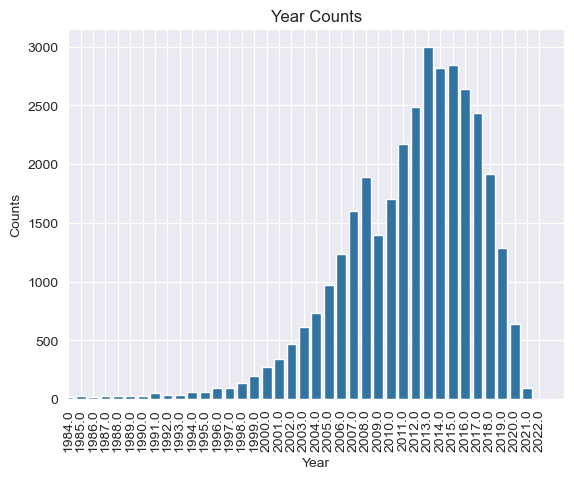

In [385]:
### Year Plot###

#year_counts = df_cleaned['year'].value_counts()

sns.countplot(x='year', data=df_cleaned)

sns.set_style('darkgrid')

plt.grid(True)
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(rotation=90)

plt.xlim(50, 90)

plt.savefig('C:/Working/Car Analysis/images/year_bar.png')

# Show the plot
plt.show()




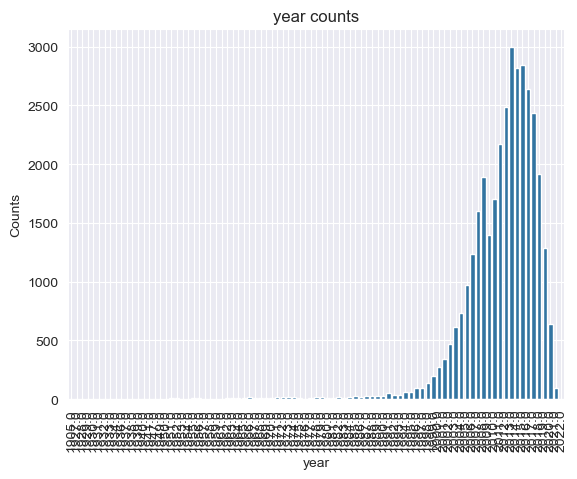

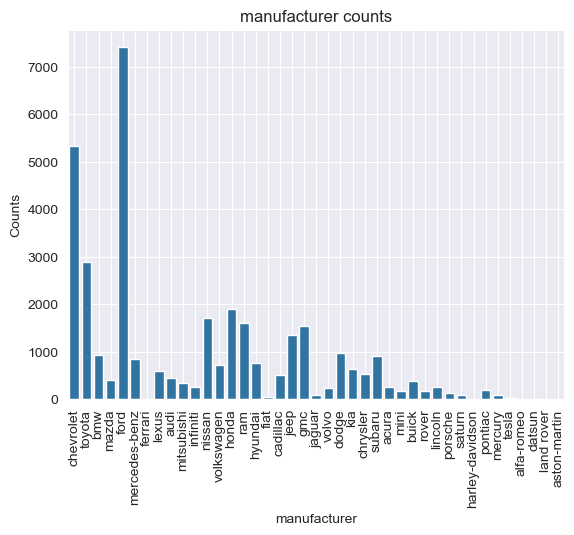

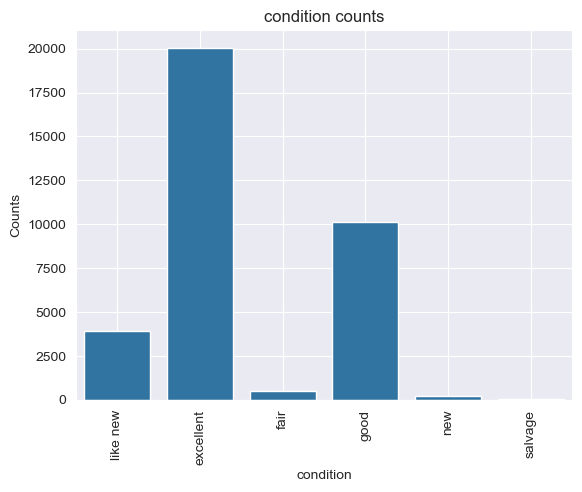

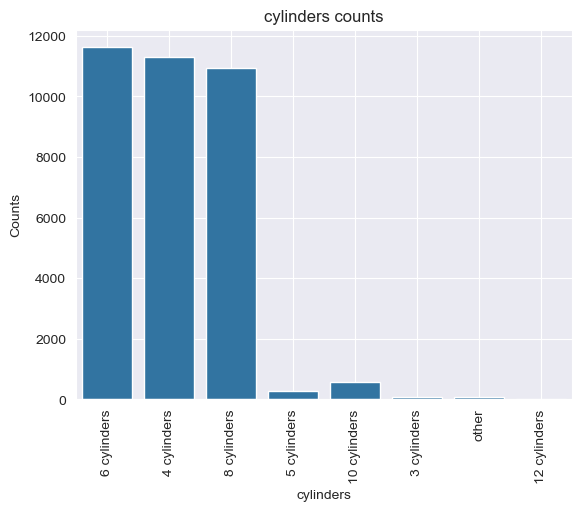

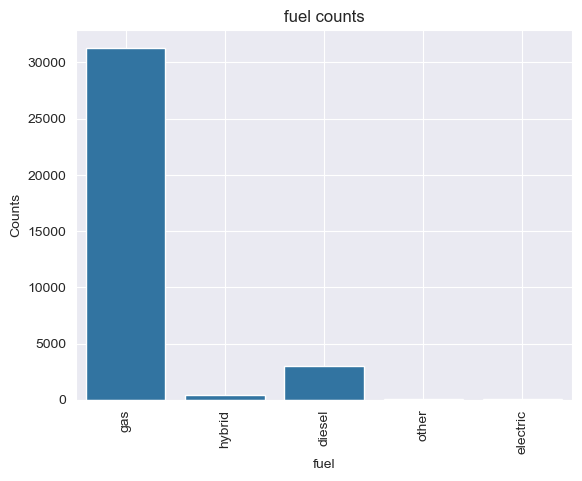

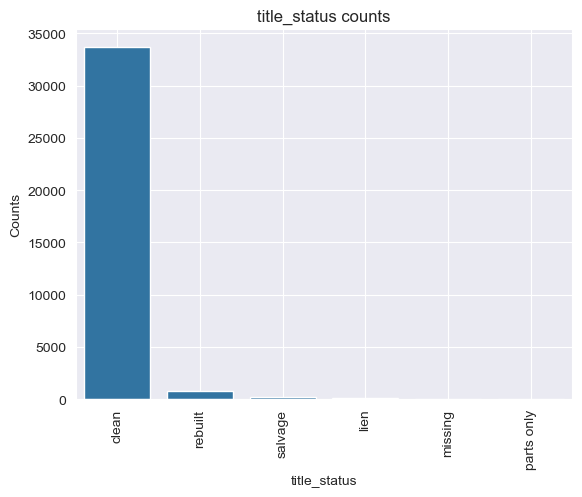

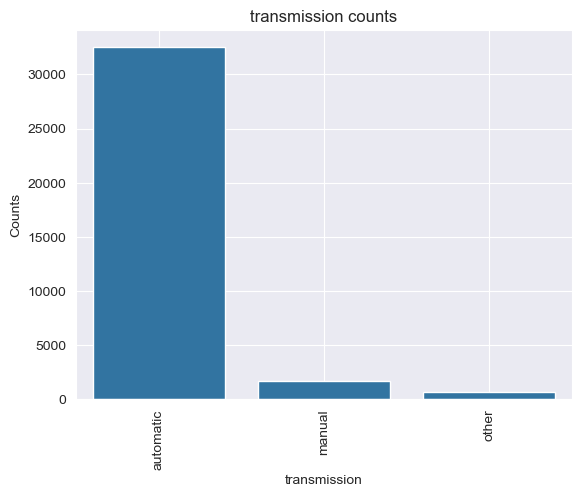

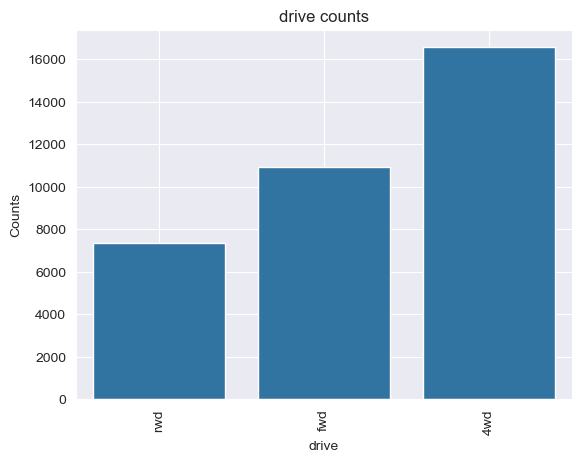

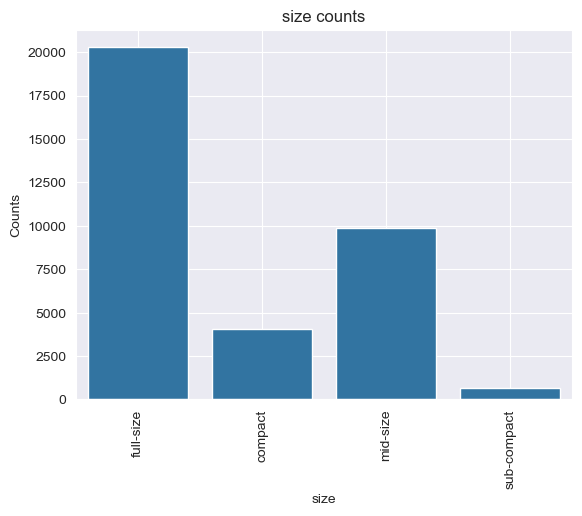

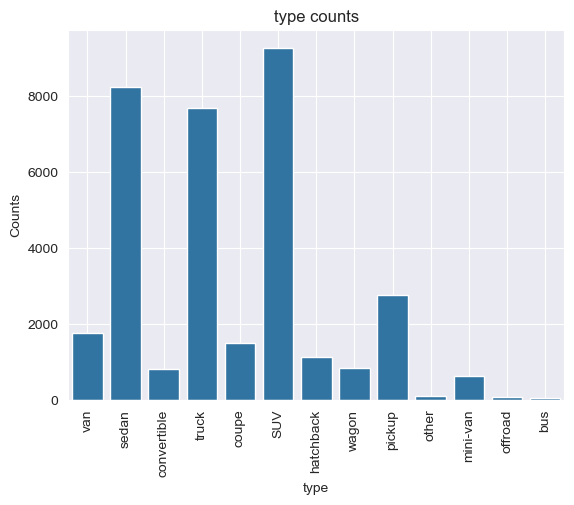

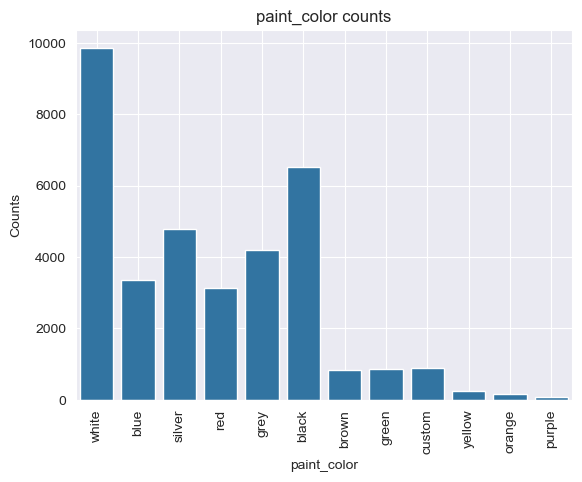

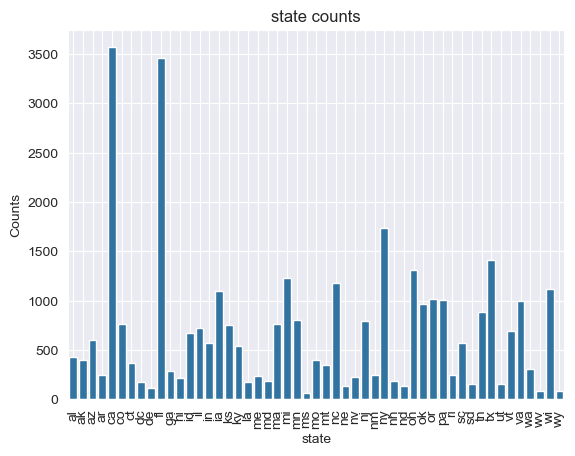

In [387]:
feature_array = ["year", "manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]

# Using a for loop
for dim_name in feature_array:

    sns.countplot(x=dim_name, data=df_cleaned)

    sns.set_style('darkgrid')

    plt.grid(True)
    plt.title(dim_name + ' counts')
    plt.xlabel(dim_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    plt.savefig("C:/Working/Car Analysis/images/" + dim_name + "_bar.png")
    plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn import set_config

set_config(display="diagram") #setting this will display your pipelines as seen above

In [393]:
train = df_cleaned

In [394]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  drive         34868 non-null  object 
 13  size          34868 non-null  object 
 14  type          34868 non-null  object 
 15  paint_color   34868 non-null  object 
 16  state         34868 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 4.8+ MB


In [396]:
train.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al


In [397]:
X = train.drop('price', axis = 1)
y = train['price']

In [398]:
#Divide input data into training/test 70% training, 30% test.
# X_train:y_train, X_test:y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [399]:
print(X_train.shape)
print(X_test.shape)
print(type(X_train), type(y_train))#should be DataFrame and Series

(24407, 16)
(10461, 16)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [400]:
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)

print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(24407,) (10461,)
Baseline for training data: 180126015.25694516
Baseline for testing data: 183561400.7911458


In [401]:
# Highest correlation:

highest_corr = train.corr(numeric_only=True)[['price']].nlargest(columns = 'price', n = 2).index[1]

print(highest_corr)

year


In [402]:
X1 = X_train[['odometer']]
lr = LinearRegression().fit(X1, y_train)
model_1_train_mse = mean_squared_error(y_train, lr.predict(X1))
model_1_test_mse = mean_squared_error(y_test, lr.predict(X_test[['odometer']]))

# Answer check
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')

Train MSE:  174121508.99
Test MSE:  174199221.22


In [403]:
pipe_1 = Pipeline([('linreg', LinearRegression())])
pipe_1.fit(X_train[['odometer']], y_train)

print(pipe_1.named_steps)
pipe_1

{'linreg': LinearRegression()}


Pipeline(steps=[('linreg', LinearRegression())])

In [404]:
print(df_cleaned['condition'].unique())
print(df_cleaned['cylinders'].unique())
print(df_cleaned['fuel'].unique())
print(df_cleaned['title_status'].unique())
print(df_cleaned['transmission'].unique())

oe_transformer = make_column_transformer(
                                          (OrdinalEncoder(categories = [['good', 'excellent', 'fair', 'like new', 'new', 'salvage']]), ['condition']),
                                          (OrdinalEncoder(categories = [['6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders', '10 cylinders','3 cylinders', 'other', '12 cylinders']]), ['cylinders']),
                                          (OrdinalEncoder(categories = [['gas', 'hybrid', 'diesel', 'other', 'electric']]), ['fuel']),
                                          (OrdinalEncoder(categories = [['clean', 'rebuilt', 'salvage', 'lien', 'missing', 'parts only']]), ['title_status']),
                                          (OrdinalEncoder(categories = [['automatic', 'manual', 'other']]), ['transmission']),
                                          remainder='passthrough')
oe_transformer.fit_transform(X_train[['odometer','condition', 'cylinders', 'fuel', 'title_status', 'transmission']])

['like new' 'excellent' 'fair' 'good' 'new' 'salvage']
['6 cylinders' '4 cylinders' '8 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']
['gas' 'hybrid' 'diesel' 'other' 'electric']
['clean' 'rebuilt' 'salvage' 'lien' 'missing' 'parts only']
['automatic' 'manual' 'other']


array([[1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        2.07798e+05],
       [1.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.54252e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.88777e+05],
       ...,
       [0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00921e+05],
       [1.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.04854e+05],
       [1.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.30000e+04]])

In [405]:
pipe_2 = Pipeline([('transformer', oe_transformer), 
                  ('linreg', LinearRegression())])
pipe_2.fit(X_train[['odometer','transmission', 'title_status', 'fuel', 'cylinders', 'condition']], y_train)
pred_train = pipe_2.predict(X_train[['odometer','transmission', 'title_status', 'fuel', 'cylinders', 'condition']])
pred_test = pipe_2.predict(X_test[['odometer','transmission', 'title_status', 'fuel', 'cylinders', 'condition']])
pipe_2_train_mse = mean_squared_error(y_train, pred_train)
pipe_2_test_mse = mean_squared_error(y_test, pred_test)

print(pipe_2.named_steps)
print(f'Train MSE: {pipe_2_train_mse: .2f}')
print(f'Test MSE: {pipe_2_test_mse: .2f}')
pipe_2

{'transformer': ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder-1',
                                 OrdinalEncoder(categories=[['good',
                                                             'excellent',
                                                             'fair', 'like new',
                                                             'new',
                                                             'salvage']]),
                                 ['condition']),
                                ('ordinalencoder-2',
                                 OrdinalEncoder(categories=[['6 cylinders',
                                                             '4 cylinders',
                                                             '8 cylinders',
                                                             '5 cylinders',
                                                             '10 cylinders',
                                      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['good',
                                                                              'excellent',
                                                                              'fair',
                                                                              'like '
                                                                              'new',
                                                                              'new',
                                                                              'salvage']]),
                                                  ['condition']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['6 '
                                                                              'cylinders',
                                                                              '4 '
                                                                              'cylinders',
                                                                              '8 '
                                                                              'cylinders',
                                                                              '5 '
                                                                              'cylinders',
                                                                              '10 '
                                                                              'cylinders',
                                                                              '3 '
                                                                              'cylinders',
                                                                              'oth...
                                                 ('ordinalencoder-3',
                                                  OrdinalEncoder(categories=[['gas',
                                                                              'hybrid',
                                                                              'diesel',
                                                                              'other',
                                                                              'electric']]),
                                                  ['fuel']),
                                                 ('ordinalencoder-4',
                                                  OrdinalEncoder(categories=[['clean',
                                                                              'rebuilt',
                                                                              'salvage',
                                                                              'lien',
                                                                              'missing',
                                                                              'parts '
                                                                              'only']]),
                                                  ['title_status']),
                                                 ('ordinalencoder-5',
                                                  OrdinalEncoder(categories=[['automatic',
                                                                              'manual',
                                                                              'other']]),
                                                  ['transmission'])])),
                ('linreg', LinearRegression())])

In [406]:
poly_oe_transformer = make_column_transformer(
                                          (OrdinalEncoder(categories = [['good', 'excellent', 'fair', 'like new', 'new', 'salvage']]), ['condition']),
                                          (OrdinalEncoder(categories = [['6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders', '10 cylinders','3 cylinders', 'other', '12 cylinders']]), ['cylinders']),
                                          (OrdinalEncoder(categories = [['gas', 'hybrid', 'diesel', 'other', 'electric']]), ['fuel']),
                                          (OrdinalEncoder(categories = [['clean', 'rebuilt', 'salvage', 'lien', 'missing', 'parts only']]), ['title_status']),
                                          (OrdinalEncoder(categories = [['automatic', 'manual', 'other']]), ['transmission']),
                                          (PolynomialFeatures(include_bias = False, degree = 2), ['odometer']),
                                          remainder='passthrough')

pipe_3 = Pipeline([('transformer', poly_oe_transformer), 
                  ('linreg', LinearRegression())])

pipe_3.fit(X_train[['odometer','transmission', 'title_status', 'fuel', 'cylinders', 'condition']], y_train)

quad_train_preds = pipe_3.predict(X_train[['odometer','transmission', 'title_status', 'fuel', 'cylinders', 'condition']])
quad_test_preds = pipe_3.predict(X_test[['odometer','transmission', 'title_status', 'fuel', 'cylinders', 'condition']])
quad_train_mse = mean_squared_error(y_train, quad_train_preds)
quad_test_mse = mean_squared_error(y_test, quad_test_preds)

print(f'Train MSE: {quad_train_mse: .2f}')
print(f'Test MSE: {quad_test_mse: .2f}')

#title_status
#fuel
#odometer
#condition
#cylinders
#transmission


Train MSE:  133686574.97
Test MSE:  136861491.88


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [427]:
print(df_cleaned['type'].unique())
print(df_cleaned['drive'].unique())
print(df_cleaned['size'].unique())
print(df_cleaned['manufacturer'].unique())

['van' 'sedan' 'convertible' 'truck' 'coupe' 'SUV' 'hatchback' 'wagon'
 'pickup' 'other' 'mini-van' 'offroad' 'bus']
['rwd' 'fwd' '4wd']
['full-size' 'compact' 'mid-size' 'sub-compact']
['chevrolet' 'toyota' 'bmw' 'mazda' 'ford' 'mercedes-benz' 'ferrari'
 'lexus' 'audi' 'mitsubishi' 'infiniti' 'nissan' 'volkswagen' 'honda'
 'ram' 'hyundai' 'fiat' 'cadillac' 'jeep' 'gmc' 'jaguar' 'volvo' 'dodge'
 'kia' 'chrysler' 'subaru' 'acura' 'mini' 'buick' 'rover' 'lincoln'
 'porsche' 'saturn' 'harley-davidson' 'pontiac' 'mercury' 'tesla'
 'alfa-romeo' 'datsun' 'land rover' 'aston-martin']


In [429]:
poly_oe_transformer = make_column_transformer(
                                          (OrdinalEncoder(categories = [['van', 'sedan', 'convertible', 'truck', 'coupe', 'SUV', 'hatchback', 'wagon', 'pickup', 'other', 'mini-van', 'offroad', 'bus']]), ['type']),
                                          (OrdinalEncoder(categories = [['rwd', 'fwd', '4wd']]), ['drive']),
                                          (OrdinalEncoder(categories = [['full-size', 'compact', 'mid-size', 'sub-compact']]), ['size']),
                                          (OrdinalEncoder(categories = [['chevrolet', 'toyota', 'bmw', 'mazda', 'ford', 'mercedes-benz', 'ferrari','lexus', 'audi', 'mitsubishi', 'infiniti', 'nissan', 'volkswagen', 'honda','ram', 'hyundai', 'fiat', 'cadillac', 'jeep', 'gmc', 'jaguar', 'volvo', 'dodge','kia', 'chrysler', 'subaru', 'acura', 'mini', 'buick', 'rover', 'lincoln','porsche', 'saturn', 'harley-davidson', 'pontiac', 'mercury', 'tesla','alfa-romeo', 'datsun', 'land rover', 'aston-martin']]), ['manufacturer']),
                                          (OrdinalEncoder(categories = [['good', 'excellent', 'fair', 'like new', 'new', 'salvage']]), ['condition']),
                                          (OrdinalEncoder(categories = [['6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders', '10 cylinders','3 cylinders', 'other', '12 cylinders']]), ['cylinders']),
                                          (OrdinalEncoder(categories = [['gas', 'hybrid', 'diesel', 'other', 'electric']]), ['fuel']),
                                          (OrdinalEncoder(categories = [['clean', 'rebuilt', 'salvage', 'lien', 'missing', 'parts only']]), ['title_status']),
                                          (OrdinalEncoder(categories = [['automatic', 'manual', 'other']]), ['transmission']),
                                          (PolynomialFeatures(include_bias = False, degree = 2), ['odometer']),
                                          remainder='passthrough')

pipe_4 = Pipeline([('transformer', poly_oe_transformer), 
                  ('linreg', LinearRegression())])

pipe_4.fit(X_train[['odometer','transmission', 'title_status', 'fuel', 'cylinders', 'condition', 'manufacturer', 'size', 'drive', 'type']], y_train)



quad_train_preds = pipe_4.predict(X_train[['odometer','transmission', 'title_status', 'fuel', 'cylinders', 'condition', 'manufacturer', 'size', 'drive', 'type']])
quad_test_preds = pipe_4.predict(X_test[['odometer','transmission', 'title_status', 'fuel', 'cylinders', 'condition', 'manufacturer', 'size', 'drive', 'type']])
quad_train_mse = mean_squared_error(y_train, quad_train_preds)
quad_test_mse = mean_squared_error(y_test, quad_test_preds)

print(f'Train MSE: {quad_train_mse: .2f}')
print(f'Test MSE: {quad_test_mse: .2f}')

Train MSE:  122953350.23
Test MSE:  125150731.43


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [433]:
"We have acquired a report consisting of used car details over a period of 20+ years. The data included region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_colr and state."
"Upon inspection of the data, we removed unnecessary colums (i.e. VIN) and cleansed data of missing values. We explored multiple ways to decide the driving factors behind vehicle prices such as correlations, plots, linear and polynomial regression models."
"During the process, we split data 70% training and 30% test. Furthermore, we categorized and encoded the string features. The model improved as we utilized additional features. We used MSE on the test data to ensure "
"the features we included were improving the model, not causing over-fitting. "
"We also learned that the newer the model (year), the more likely the vehicle is purchased. More recent data in 2009 and 2019 were an exception due to the Great Recession and Covid outbreak."
"Overall we learned the features most valuable in vehicle purchase were the odometer reading, title status, fuel type, and condition."
"The following was the set of features which resulted in the best results: odometer, transmission, title_status, fuel, cylinders, condition, manufacturer, size, drive, type."

'The following was the set of features which resulted in the best results: odometer, transmission, title_status, fuel, cylinders, condition, manufacturer, size, drive, type.'